## Data Mining and Machine Learning 
### Logistic Regression
###  Libraries: scikit-learn and h2o
#### Edgar Acuna
#### Marzo 2020

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)
import warnings
warnings.filterwarnings('ignore')

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O cluster uptime:,14 hours 39 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.4835
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_eacun_smx5vj
H2O cluster total nodes:,1
H2O cluster free memory:,3.312 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


### Example 1: Predicting the final grade in a class

In [35]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
databin=df[['E1','pass']]
print(databin.head())

    E1  pass
0   96     1
1   96     1
2  100     1
3   93     1
4   90     1


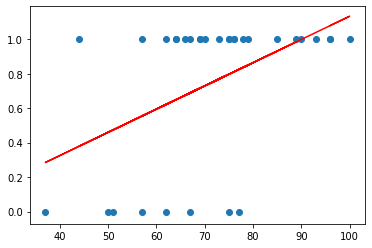

In [36]:
#Trazando la linea de regresion sobre el plot de puntos
x1=databin.iloc[:,0]
x2=databin.iloc[:,1]
plt.scatter(x1,x2)
plt.plot(x1, np.poly1d(np.polyfit(x1, x2, 1))(x1),color='red')

plt.show()

### Applying Logistic Regression to predict Final Grade. Use of sckikit-learn

In [37]:
#Applying Logistic Regression to predict Final Grade
X=df[['E1',"E2"]]
y3=df['pass']
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(X, y3)
print("Coeficientes del modelo", model.coef_)

Coeficientes del modelo [[0.84415919 0.5817652 ]]


In [38]:
#Accuracy
model.score(X,y3)

1.0

In [39]:
# Tasa de precision
pred = model.predict(X)
print(pred)
pred1=model.predict_proba(X)
print(pred1[0:5,:])
print(classification_report(y3, pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



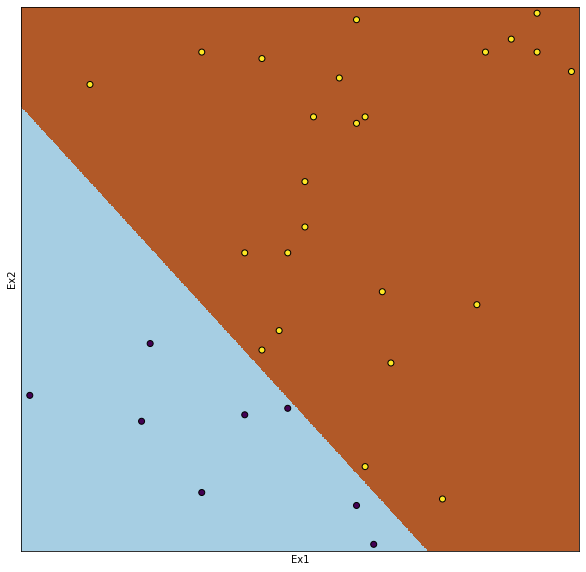

In [40]:
from matplotlib.colors import ListedColormap
logis = LogisticRegression(solver="newton-cg")
X1=df.iloc[:,0:2].as_matrix()
y1=df['pass'].as_matrix()
logis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=logis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Logistic Regression using library H2o

In [41]:
df1=h2o.H2OFrame(df)
myx=['E1','E2']
myy='Nota'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True) #Lmbda es un parametro de regularizacion
glm_model.train(myx, myy, training_frame= df1)
y_pred=glm_model.predict(df1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


In [42]:
print((y_pred['predict']==df1['Nota']).sum()/len(df1))

1.0


### Example 2. Logistic Regression for Diabetes using sckit-learn

In [43]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#The response  variable must be binary (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
#Haciendo la regresion logistica y calculando su precision
model = LogisticRegression()
model = model.fit(X, y)
print(model.coef_)

[[ 1.17052230e-01  2.83873955e-02 -1.68897224e-02  7.55274087e-04
  -6.42755924e-04  5.97603789e-02  6.77671880e-01  7.23947807e-03]]


In [44]:
model.score(X,y)

0.7747395833333334

In [45]:
predictions = model.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



Estimating the accuracy using 10-fold cross-validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.767 (+/- 0.071)


### Logistic regression for Diabetes  using the H2o library

In [47]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy='C9'
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(myx, myy, training_frame= diabetes)
y_pred=glm_model.predict(diabetes)
#print (y_pred['predict']==diabetes['C9']).sum()/float(len(diabetes))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


In [48]:
print((y_pred['predict']==diabetes['C9']).sum()/len(diabetes))

0.7669270833333334


Estimating the accuracy using 10-fold crossvalidation

In [49]:
model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True,nfolds=10)
model.train(myx, myy, training_frame= diabetes)
model.confusion_matrix

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1585354731931_93


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,8,8,5,py_3_sid_a634




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1527257557008024
RMSE: 0.39080142745491914
LogLoss: 0.47099308448839067
Null degrees of freedom: 767
Residual degrees of freedom: 759
Null deviance: 993.4839101388008
Residual deviance: 723.4453777741679
AIC: 741.4453777741679
AUC: 0.8393582089552238
pr_auc: 0.7260600743790002
Gini: 0.6787164179104477

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35438353580758675: 


,,1,2,Error,Rate
0,1,392.0,108.0,0.216,(108.0/500.0)
1,2,70.0,198.0,0.2612,(70.0/268.0)
2,Total,462.0,306.0,0.2318,(178.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.354384,0.689895,199.0
1,max f2,0.150764,0.801001,297.0
2,max f0point5,0.647587,0.710227,102.0
3,max accuracy,0.486768,0.785156,148.0
4,max precision,0.992589,1.000000,0.0
5,max recall,0.013685,1.000000,392.0
6,max specificity,0.992589,1.000000,0.0
7,max absolute_mcc,0.486768,0.510942,148.0
8,max min_per_class_accuracy,0.331064,0.753731,207.0
9,max mean_per_class_accuracy,0.354384,0.761403,199.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.90 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.954998,2.149254,2.149254,0.750000,0.967687,0.750000,0.967687,0.022388,0.022388,114.925373,114.925373
1,,2,0.020833,0.929564,2.507463,2.328358,0.875000,0.941653,0.812500,0.954670,0.026119,0.048507,150.746269,132.835821
2,,3,0.031250,0.904904,2.507463,2.388060,0.875000,0.919607,0.833333,0.942982,0.026119,0.074627,150.746269,138.805970
3,,4,0.040365,0.889511,2.456290,2.403467,0.857143,0.899309,0.838710,0.933120,0.022388,0.097015,145.628998,140.346654
4,,5,0.050781,0.873684,2.507463,2.424799,0.875000,0.881319,0.846154,0.922495,0.026119,0.123134,150.746269,142.479908
5,,6,0.100260,0.779379,2.488610,2.456290,0.868421,0.830810,0.857143,0.877248,0.123134,0.246269,148.860958,145.628998
6,,7,0.151042,0.709322,2.277842,2.396294,0.794872,0.747140,0.836207,0.833505,0.115672,0.361940,127.784156,139.629439
7,,8,0.200521,0.644435,2.111548,2.326032,0.736842,0.678250,0.811688,0.795195,0.104478,0.466418,111.154753,132.603218
8,,9,0.300781,0.458147,1.339795,1.997286,0.467532,0.547386,0.696970,0.712592,0.134328,0.600746,33.979453,99.728630
9,,10,0.399740,0.352927,1.395130,1.848218,0.486842,0.401620,0.644951,0.635609,0.138060,0.738806,39.512962,84.821819




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.15694919317651992
RMSE: 0.39616813750795243
LogLoss: 0.4828259532276664
Null degrees of freedom: 767
Residual degrees of freedom: 759
Null deviance: 996.892659590556
Residual deviance: 741.6206641576956
AIC: 759.6206641576956
AUC: 0.8302164179104478
pr_auc: 0.7114442961939422
Gini: 0.6604328358208955

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34208321338963377: 


,,1,2,Error,Rate
0,1,387.0,113.0,0.226,(113.0/500.0)
1,2,71.0,197.0,0.2649,(71.0/268.0)
2,Total,458.0,310.0,0.2396,(184.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.342083,0.681661,199.0
1,max f2,0.176879,0.797566,284.0
2,max f0point5,0.550816,0.696078,125.0
3,max accuracy,0.490416,0.779948,145.0
4,max precision,0.991951,1.000000,0.0
5,max recall,0.014331,1.000000,392.0
6,max specificity,0.991951,1.000000,0.0
7,max absolute_mcc,0.490416,0.498773,145.0
8,max min_per_class_accuracy,0.327860,0.750000,206.0
9,max mean_per_class_accuracy,0.342083,0.754537,199.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 296.68 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,5.237835,1.791045,1.791045,0.625000,5.964032,0.625000,5.964032,0.018657,0.018657,79.104478,79.104478
1,,2,0.020833,4.305642,1.791045,1.791045,0.625000,4.826305,0.625000,5.395168,0.018657,0.037313,79.104478,79.104478
2,,3,0.031250,3.851271,1.432836,1.671642,0.500000,3.920521,0.583333,4.903619,0.014925,0.052239,43.283582,67.164179
3,,4,0.040365,3.761452,0.409382,1.386615,0.142857,3.818930,0.483871,4.658689,0.003731,0.055970,-59.061834,38.661531
4,,5,0.050781,3.688835,0.358209,1.175660,0.125000,3.724805,0.410256,4.467124,0.003731,0.059701,-64.179104,17.566016
5,,6,0.100260,3.494577,0.829537,1.004846,0.289474,3.589193,0.350649,4.033859,0.041045,0.100746,-17.046347,0.484590
6,,7,0.151042,3.316525,0.955224,0.988163,0.333333,3.390458,0.344828,3.817543,0.048507,0.149254,-4.477612,-1.183736
7,,8,0.200521,3.229827,0.980361,0.986238,0.342105,3.273578,0.344156,3.683318,0.048507,0.197761,-1.963865,-1.376236
8,,9,0.300781,3.049543,1.079279,1.017251,0.376623,3.130032,0.354978,3.498889,0.108209,0.305970,7.927893,1.725141
9,,10,0.399740,2.931606,1.282011,1.082794,0.447368,2.983438,0.377850,3.371285,0.126866,0.432836,28.201100,8.279450




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.77663285,0.07915714,0.6883117,0.73255813,0.7654321,0.8604651,0.89705884,0.859375,0.74698794,0.64615387,0.7777778,0.7922078
1,auc,0.83052224,0.058540225,0.8130769,0.81887615,0.85007495,0.87295824,0.9328063,0.8964102,0.80935675,0.7356979,0.80134934,0.7746154
2,err,0.22336717,0.07915714,0.3116883,0.26744187,0.2345679,0.13953489,0.10294118,0.140625,0.25301206,0.35384616,0.22222222,0.20779221
3,err_count,17.2,6.0699625,24.0,23.0,19.0,12.0,7.0,9.0,21.0,23.0,18.0,16.0
4,f0point5,0.68230295,0.12347702,0.55837566,0.6810036,0.5988024,0.84070796,0.8490566,0.81395346,0.6976744,0.48387095,0.6115108,0.6880734
5,f1,0.7159692,0.08873948,0.64705884,0.7676768,0.6779661,0.76,0.8372093,0.8235294,0.7741935,0.5660377,0.65384614,0.65217394
6,f2,0.765626,0.088019915,0.7692308,0.8796296,0.78125,0.69343066,0.82568806,0.8333333,0.8695652,0.6818182,0.70247936,0.6198347
7,lift_top_group,2.9630296,0.4967928,3.08,2.2051282,3.5217392,2.9655173,3.090909,2.56,2.1842105,3.4210527,3.5217392,3.08
8,logloss,0.48146456,0.062158167,0.47832632,0.54136664,0.46260524,0.40630704,0.37102377,0.44633344,0.5636045,0.53935355,0.4838221,0.52190316
9,max_per_class_error,0.33305743,0.10724638,0.40384614,0.4680851,0.27586207,0.3448276,0.18181819,0.16,0.42222223,0.41304347,0.26086956,0.4



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-03-28 10:58:56,0.000 sec,0,496.741955,0.646799
1,,2020-03-28 10:58:56,0.004 sec,1,370.890960,0.482931
2,,2020-03-28 10:58:56,0.004 sec,2,362.029436,0.471392
3,,2020-03-28 10:58:56,0.004 sec,3,361.723247,0.470994
4,,2020-03-28 10:58:56,0.008 sec,4,361.722689,0.470993
5,,2020-03-28 10:58:56,0.008 sec,5,361.722689,0.470993


<bound method H2OBinomialModel.confusion_matrix of >